# Time-frequency analysis of EEG signals

author: Carina Forster

contact: forster@cbs.mpg.de

last updated 27.06.2024

Aim: what is the spectral content of the data?

In [60]:
import mne
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt

In [61]:
# load the clean epochs
data_dir = Path("C:/", "Users", "Carina", "Desktop", "data_liverpool")
epochs = mne.read_epochs(Path(data_dir, 'average_ref-epo.fif'))

Reading C:\Users\Carina\Desktop\data_liverpool\average_ref-epo.fif ...
    Found the data of interest:
        t =   -1000.64 ...    1000.64 ms
        0 CTF compensation matrices available
Not setting metadata
320 matching events found
No baseline correction applied
0 projection items activated


Let's look at power

In [62]:
spectrum = epochs.compute_psd(fmin=2, fmax=40)

    Using multitaper spectrum estimation with 7 DPSS windows


In [41]:
len(spectrum.freqs)

76

Plotting power spectral density (dB=True).
Averaging across epochs...


C:\Users\Carina\AppData\Local\Temp\ipykernel_36192\3073395990.py:1: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  spectrum.plot(dB=True);
C:\Users\Carina\AppData\Roaming\Python\Python39\site-packages\mne\viz\utils.py:167: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


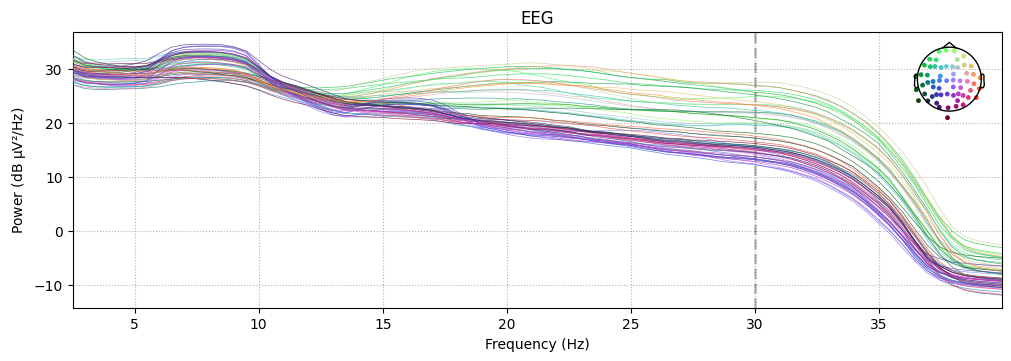

In [63]:
spectrum.plot(dB=True);

Plotting amplitude spectral density (dB=False).
Averaging across epochs...


C:\Users\Carina\AppData\Local\Temp\ipykernel_36192\3768195132.py:1: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  spectrum.plot(dB=False);
C:\Users\Carina\AppData\Roaming\Python\Python39\site-packages\mne\viz\utils.py:167: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


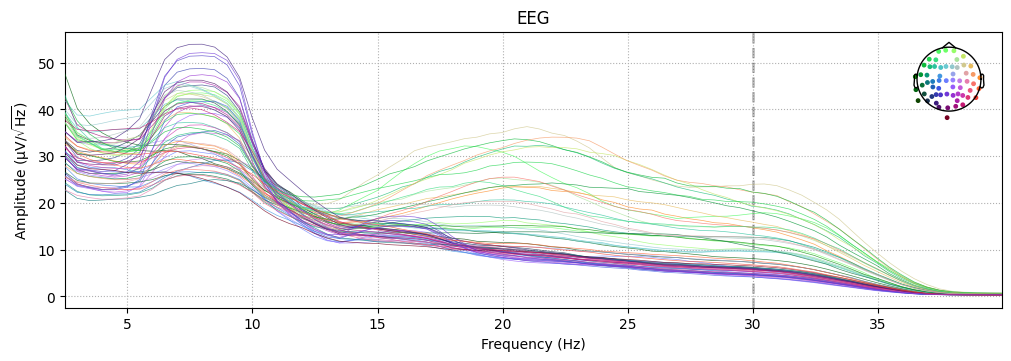

In [64]:
spectrum.plot(dB=False);

Plotting power spectral density (dB=True).


C:\Users\Carina\AppData\Local\Temp\ipykernel_16288\4028036250.py:1: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  spectrum[5].plot()
C:\Users\Carina\AppData\Roaming\Python\Python39\site-packages\mne\viz\utils.py:167: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


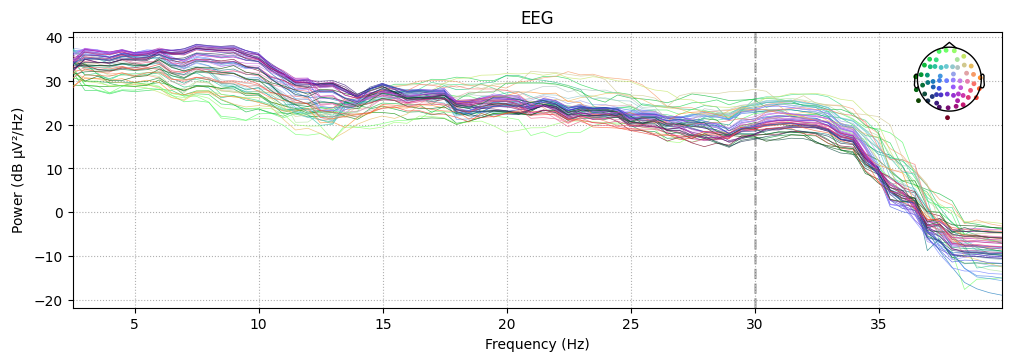

In [18]:
spectrum[5].plot()

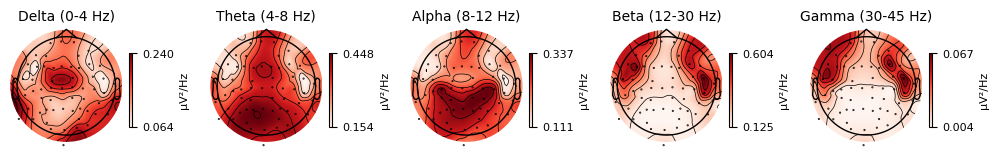

In [65]:
spectrum.plot_topomap(ch_type='eeg', normalize=True);

<div class="alert alert-block alert-success">
<b>Exercise:</b> 

Determine the individual alpha peak frequency from the PSD and plot the peaks

</div>

In [66]:
import scipy
import numpy as np

spectrum._data.shape

# so we average over channels and epochs

spectrum_avg = np.mean(spectrum._data, axis=(0,1))

peak = scipy.signal.find_peaks(spectrum_avg)

In [68]:
# where is the peak? 

for p in peak[0]:
    print(spectrum.freqs[p])

7.488964965515898
16.974987255169367
19.970573241375725


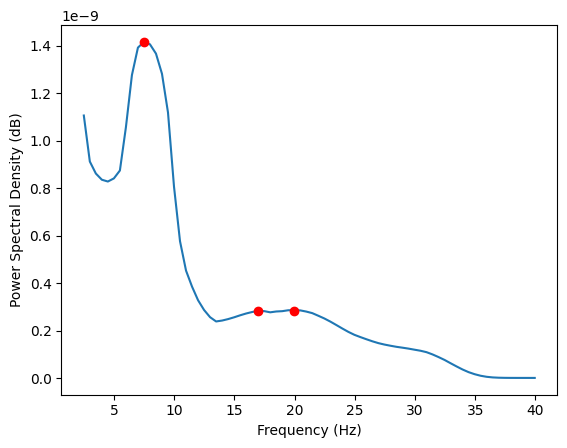

In [70]:
# plot the spectrum with the peaks highlighted
plt.plot(spectrum.freqs, spectrum_avg)
plt.plot(spectrum.freqs[peak[0][0]], spectrum_avg[peak[0][0]], 'ro')
plt.plot(spectrum.freqs[peak[0][1]], spectrum_avg[peak[0][1]], 'ro')
plt.plot(spectrum.freqs[peak[0][2]], spectrum_avg[peak[0][1]], 'ro')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density (dB)')
plt.show()

check out:

https://mne.discourse.group/t/individual-alpha-frequency/1500/2

## But what about time? 

In [71]:
freqs = np.logspace(*np.log10([6, 35]), num=16) # frequency resolution
n_cycles = freqs / 4.0  # different number of cycle per frequency


power, itc = epochs.compute_tfr(
    method="morlet",
    freqs=freqs,
    n_cycles=n_cycles,
    average=True,
    return_itc=True,
    decim=3,
)

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    5.5s


In [73]:
freqs

array([ 6.        ,  6.74857953,  7.59055427,  8.53757652,  9.60275235,
       10.80082298, 12.14836881, 13.66403883, 15.36880878, 17.28627138,
       19.44296285, 21.86873017, 24.59714411, 27.66596385, 31.11765953,
       35.        ])

In [74]:
n_cycles

array([1.5       , 1.68714488, 1.89763857, 2.13439413, 2.40068809,
       2.70020575, 3.0370922 , 3.41600971, 3.8422022 , 4.32156784,
       4.86074071, 5.46718254, 6.14928603, 6.91649096, 7.77941488,
       8.75      ])

No baseline correction applied


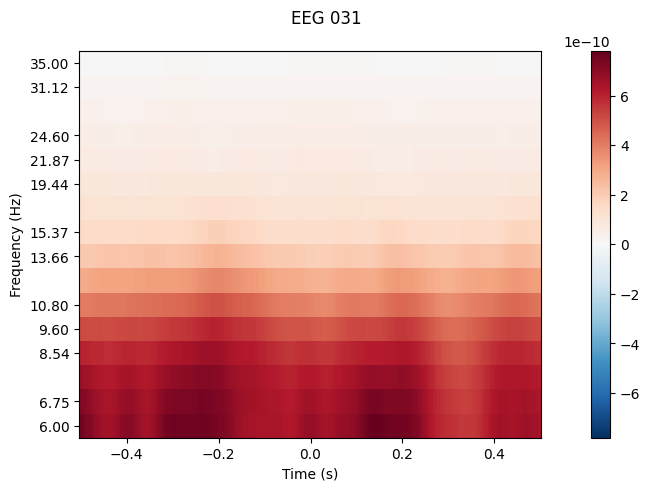

[<Figure size 640x480 with 2 Axes>]

In [75]:
power.copy().crop(-0.5,0.5).plot(picks=[30], title=power.ch_names[30], mode="mean")

Applying baseline correction (mode: percent)


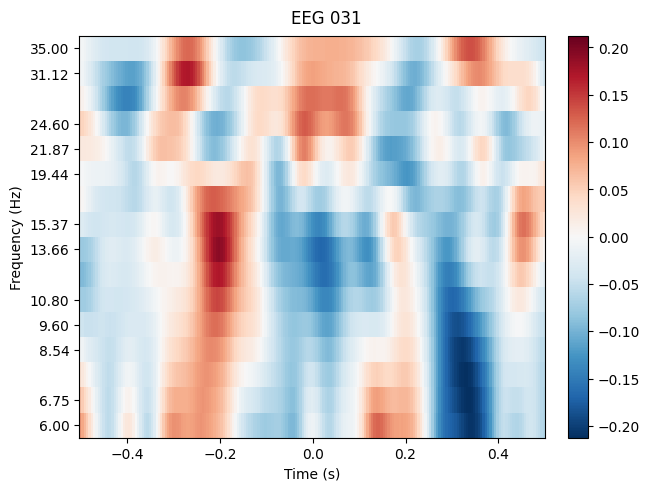

[<Figure size 640x480 with 2 Axes>]

In [76]:
power.copy().crop(-0.5,0.5).plot(picks=[30], title=power.ch_names[30], baseline=(-0.5, 0), mode="percent")

Applying baseline correction (mode: zscore)


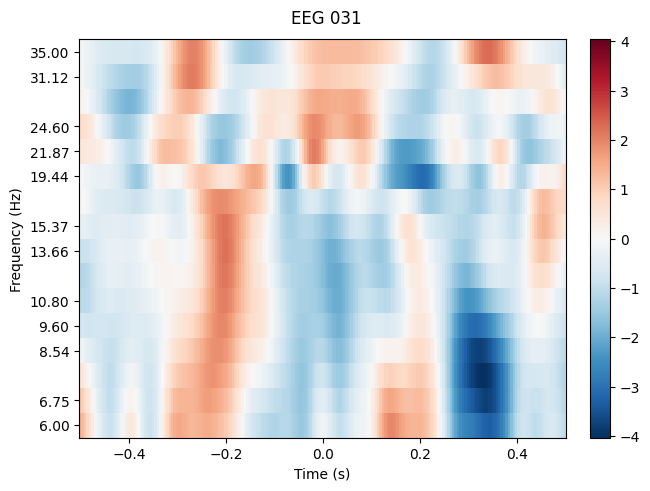

[<Figure size 640x480 with 2 Axes>]

In [77]:
power.copy().crop(-0.5,0.5).plot(picks=[30], title=power.ch_names[30], baseline=(-0.5, 0), mode="zscore")

Applying baseline correction (mode: logratio)


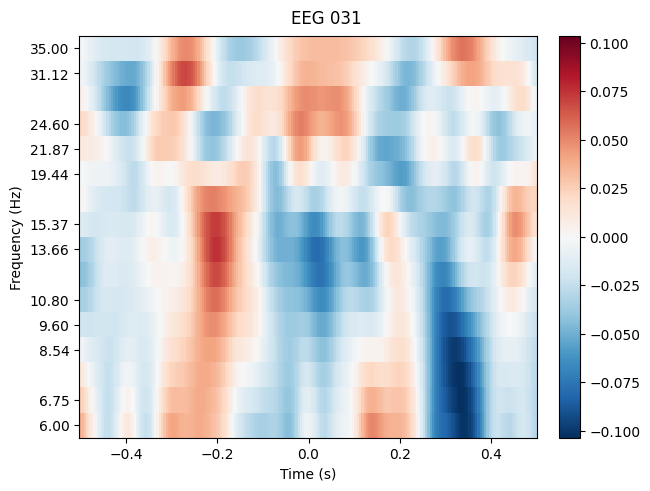

[<Figure size 640x480 with 2 Axes>]

In [78]:
power.copy().crop(-0.5,0.5).plot(picks=[30], title=power.ch_names[30], baseline=(-0.5, 0), mode="logratio")

Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)


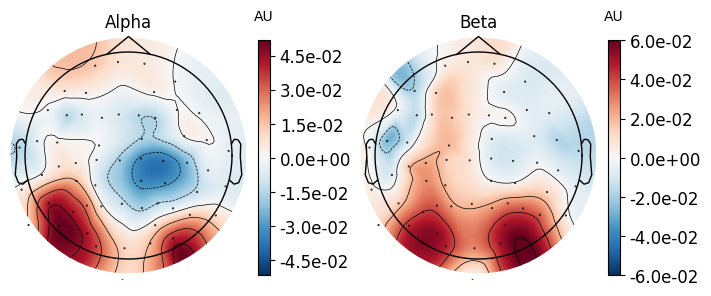

In [79]:
fig, axes = plt.subplots(1, 2, figsize=(7, 4), layout="constrained")
topomap_kw = dict(
    ch_type="eeg", tmin=0.5, tmax=1.5, baseline=(-0.5, 0), mode="logratio", show=False
)
plot_dict = dict(Alpha=dict(fmin=8, fmax=12), Beta=dict(fmin=13, fmax=25))
for ax, (title, fmin_fmax) in zip(axes, plot_dict.items()):
    power.plot_topomap(**fmin_fmax, axes=ax, **topomap_kw)
    ax.set_title(title)

Applying baseline correction (mode: zscore)
No baseline correction applied
No baseline correction applied


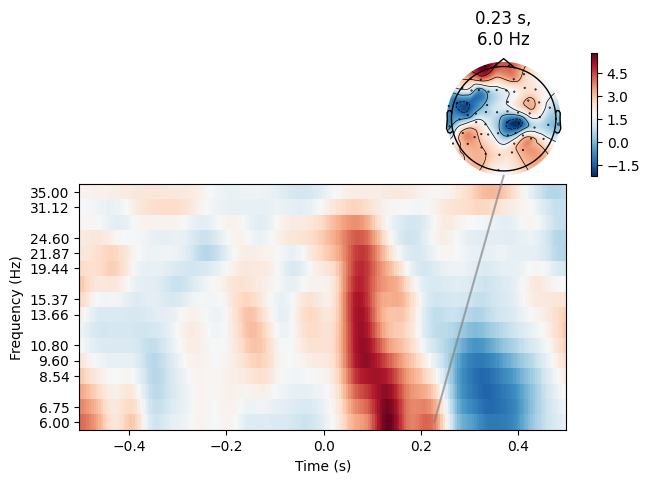

In [81]:
power.copy().crop(-0.5, 0.5).apply_baseline((-0.5,0), mode='zscore').plot_joint();

<div class="alert alert-block alert-warning">
<b>Discussion:</b> 

When do you choose PSD over TFR?

</div>


<div class="alert alert-block alert-info">
<b>Bonus:</b> 

Wavelets excurs:

In the context of Morlet wavelets, the relationship between the number of cycles and temporal precision is an important aspect of time-frequency analysis. Here’s a detailed explanation:

Morlet Wavelets
A Morlet wavelet is a complex sinusoid modulated by a Gaussian window. It is widely used in time-frequency analysis because it provides a good balance between time and frequency resolution.

Key Concepts
Number of Cycles: This refers to how many oscillations of the sinusoidal part of the wavelet fit within the Gaussian window.
Temporal Precision: This is how precisely the wavelet can localize events in time.
Frequency Precision: This is how precisely the wavelet can localize events in frequency.
Relationship Between Cycles and Precision
Low Number of Cycles:
High Temporal Precision: The wavelet is shorter in duration, allowing it to better localize transient events in time.
Low Frequency Precision: The wavelet has a broader frequency response, meaning it is less precise in distinguishing between different frequencies.
High Number of Cycles:
Low Temporal Precision: The wavelet is longer in duration, which means it cannot localize transient events in time as well.
High Frequency Precision: The wavelet has a narrower frequency response, providing better resolution of different frequencies.
Trade-Off
There is an inherent trade-off between temporal and frequency precision when using Morlet wavelets:

Short Wavelets (few cycles): Good for time localization, but poor for frequency localization.
Long Wavelets (many cycles): Good for frequency localization, but poor for time localization.
Practical Implications
In practical applications, the choice of the number of cycles depends on the specific requirements of the analysis:

Analyzing Rapid Transients: Use fewer cycles to achieve better temporal resolution.
Analyzing Steady-State Oscillations: Use more cycles to achieve better frequency resolution.
Example
Suppose you are analyzing EEG data to study brain rhythms:

If you are interested in detecting short, transient events like spikes, you would use a wavelet with fewer cycles (e.g., 3-5 cycles) to get high temporal precision.
If you are interested in the detailed spectral content of ongoing oscillations, you would use a wavelet with more cycles (e.g., 7-10 cycles) to get high frequency precision.

</div>